# BlinkIT Grocery Data Analysis Project

## 1. Introduction

#### This project analyzes BlinkIT's grocery data to generate business insights.

## 2. Tools Used

#### - Python
- Pandas
- Matplotlib
- Seaborn
- Jupyter Notebook

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the CSV
df = pd.read_csv("BlinkIT Grocery Data.csv")

In [7]:
# Display first 5 rows
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


# Data Exploration 

In [8]:
# Shape of the dataset (rows, columns)
df.shape

(8523, 12)

In [9]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                8523 non-null   float64
 10  Total Sales                8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
# Statistical summary for numerical columns
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Total Sales,Rating
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,10.650590,140.992782,3.965857
std,8.371760,0.051598,6.431899,62.275067,0.605651
min,1998.000000,0.000000,0.000000,31.290000,1.000000
25%,2000.000000,0.026989,6.650000,93.826500,4.000000
50%,2012.000000,0.053931,11.000000,143.012800,4.000000
75%,2017.000000,0.094585,16.000000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## Data Cleaning
- Handle missing values
- Remove duplicates
- Fix data types (if needed)

In [11]:
# Check for missing values
df.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Total Sales                  0
Rating                       0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [14]:
# Drop duplicates if necessary
df = df.drop_duplicates()


In [16]:
# Handle missing values (example)
df = df.dropna()  # or use fillna()

In [19]:
# check all the column names
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [21]:
# column names have extra spaces
df.columns = df.columns.str.strip()

In [23]:
print(df.columns.tolist())

['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Total Sales', 'Rating']


# Exploratory Data Analysis (EDA)

#### we'll explore the BlinkIT Grocery data to understand patterns, trends, and distributions.

## Top-Selling Products

In [25]:
print(df.columns.tolist())

['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Total Sales', 'Rating']


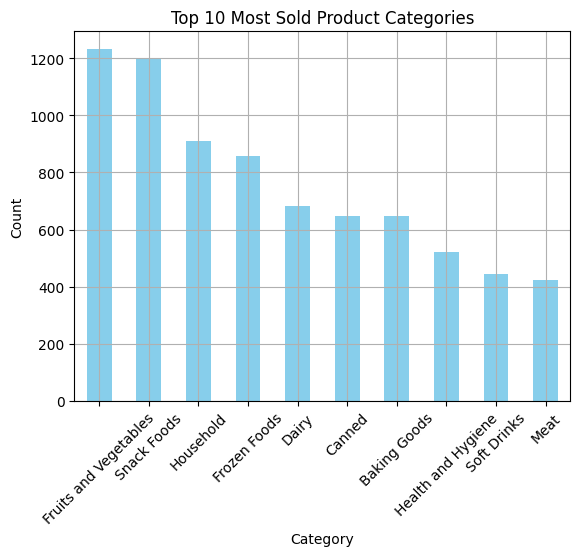

In [17]:
top_products = df['Item Type'].value_counts().head(10)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Sold Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### These are the most frequently purchased product categories, suggesting high demand and daily need staples.

# Top Categories by Total Sales

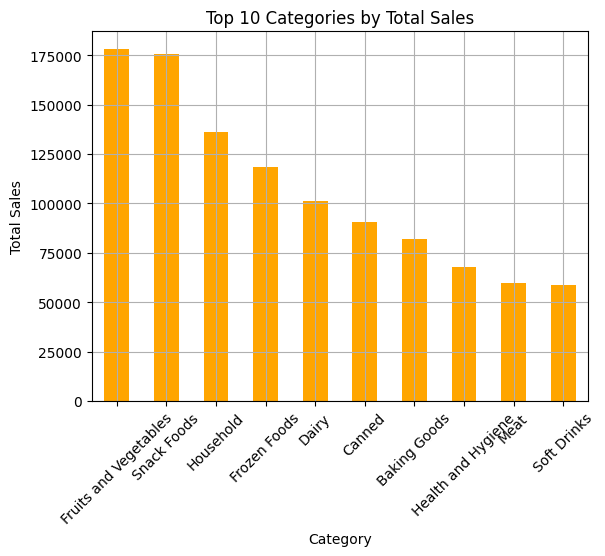

In [18]:
sales_by_category = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False).head(10)
sales_by_category.plot(kind='bar', color='orange')
plt.title('Top 10 Categories by Total Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### These categories contribute the most to overall revenue. Useful for pricing and promotional planning.

# Product Availability Status

In [33]:
df['Availability Status'] = df['Total Sales'].apply(lambda x: 'In Stock' if x > 0 else 'Out of Stock')


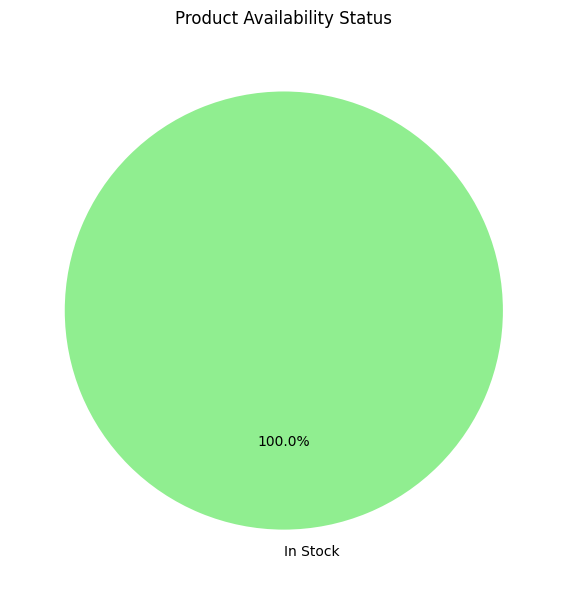

In [35]:
import matplotlib.pyplot as plt

# Count availability status
availability_counts = df['Availability Status'].value_counts()

# Plot
availability_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    startangle=90,
    explode=[0.02] * len(availability_counts),  # Dynamically match length
    figsize=(6, 6)
)

plt.title("Product Availability Status")
plt.ylabel("")
plt.tight_layout()
plt.show()


#### Helps understand supply consistency — a higher “Out of Stock” ratio indicates demand/supply mismatch.

# Top Performing Brands



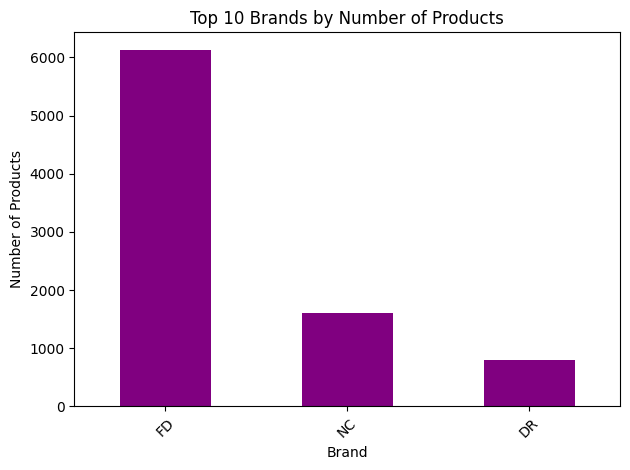

In [37]:
# Create a 'Brand' column using first 2–3 characters of Item Identifier
df['Brand'] = df['Item Identifier'].str[:2]  # or use [:3] based on the data pattern

# Now plot top 10 brands
df['Brand'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Brands by Number of Products")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### The chart shows which brands have the highest number of products listed — helpful for identifying dominant suppliers or overrepresented brands in the inventory.

# Price Distribution

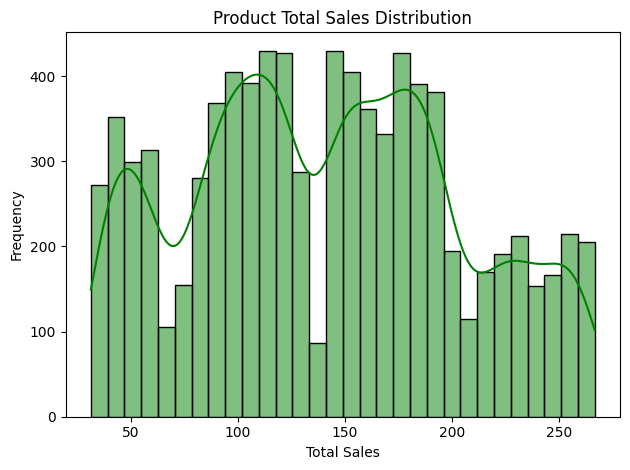

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Total Sales'], bins=30, kde=True, color='green')
plt.title("Product Total Sales Distribution")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Shows price spread — useful for understanding product affordability and segmentation.



#### This EDA helped uncover product performance, pricing structure, and supply gaps in BlinkIT's grocery inventory. These insights can support better inventory decisions, promotional targeting, and business strategy.